In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("Lena512warna.bmp")
image = np.array(image)
image
image.shape

(512, 512, 3)

In [3]:
def RGB2GRAY2(image):
    new_image = np.zeros((image.shape[1], image.shape[0]))
    
    for j in range(new_image.shape[1]):
        for i in range(new_image.shape[0]):
            new_image[j, i] = (0.299 * image[j,i,0]) + (0.587 * image[j,i,1]) + (0.144  * image[j,i,2])
    
    new_image = new_image.astype("uint8")
    return new_image

In [4]:
new_image = RGB2GRAY2(image)

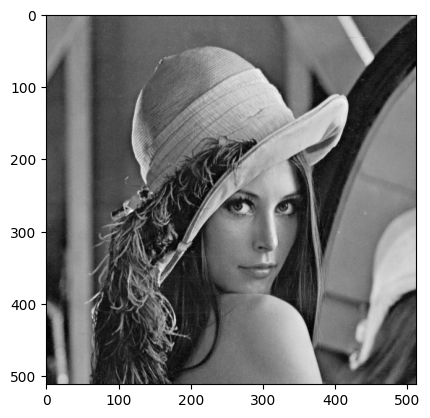

In [5]:
plt.imshow(new_image, cmap='gray')

In [6]:
array_image = np.array(new_image)
print(array_image)

[[150 150 152 ... 156 141 113]
 [150 150 152 ... 156 141 113]
 [150 150 152 ... 156 141 113]
 ...
 [ 40  40  46 ...  92  87  85]
 [ 41  41  51 ...  90  91  94]
 [ 41  41  51 ...  90  91  94]]


In [7]:
his_image, bins = np.histogram(array_image, bins=256, range=(0, 255))
print(his_image)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1    6    9   28   60
   98  127  178  252  360  494  542  737  960 1044 1291 1430 1757 1860
 2038 2102 2165 2177 2214 2196 2118 1976 1890 1897 1682 1602 1428 1370
 1301 1160 1185 1066 1076 1053  999  995  991 1031 1002 1057 1025 1106
 1056 1033 1073 1083 1090 1059 1166 1184 1269 1306 1406 1463 1674 1821
 1872 2110 2121 1961 2029 1905 1985 1823 1756 1739 1679 1562 1615 1573
 1559 1528 1531 1467 1535 1631 1654 1685 1715 1833 1979 2119 2219 2192
 2289 2258 2409 2177 2100 2146 1994 1823 1922 1922 1896 1940 2000 2012
 2060 2098 2052 2092 2003 2112 1969 2090 2025 2179 2226 2370 2467 2417
 2421 2501 2478 2471 2545 2417 2274 2329 2209 2095 1931 1674 1676 1588
 1508 1384 1315 1238 1163 1193 1157 1086 1088 1055  995  909  822  764
  703  664  628  607  603  574  567  613  545  633  674  675  661  737
  694  696  665  684  665  678  668  720  751  755  785  773  763  904
  896 

In [8]:
def ImageHistogram(new_image):
    new_image2 = np.zeros(256, dtype=np.int32)  
    M, N = new_image.shape

    for i in range(M):
        for j in range(N):
            intensity = image[i, j]
            new_image2[intensity] += 1

    return new_image2

Text(0.5, 1.0, 'Histogram')

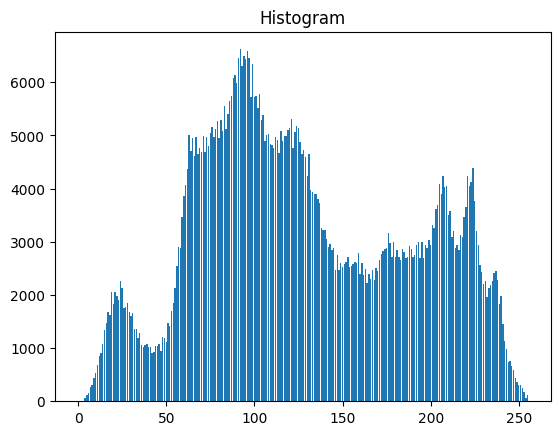

In [9]:
histogram = ImageHistogram(new_image)
plt.bar(range(256), histogram)
plt.title("Histogram")

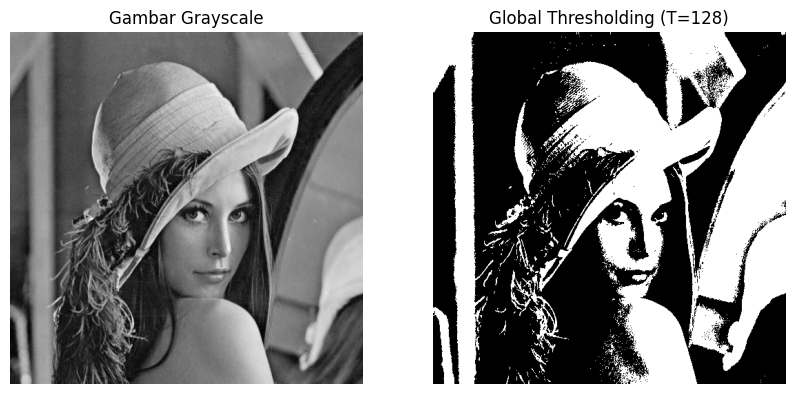

In [10]:
threshold_value = 128

binary_image = np.where(array_image < threshold_value, 0, 255).astype(np.uint8)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(array_image, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title(f"Global Thresholding (T={threshold_value})")
plt.axis("off")

plt.show()

In [11]:
def AdaptiveThreshold_Mean(new_image, window_size=15, C=3):

    M, N = new_image.shape
    new_image2 = np.zeros((M, N), dtype=np.uint8)
    pad = window_size // 2

    padded_image = np.pad(new_image, pad, mode='reflect')

    for i in range(M):
        for j in range(N):
            local_region = padded_image[i:i+window_size, j:j+window_size]
            local_threshold = np.mean(local_region) - C

            new_image2[i, j] = 255 if new_image[i, j] > local_threshold else 0

    return new_image2

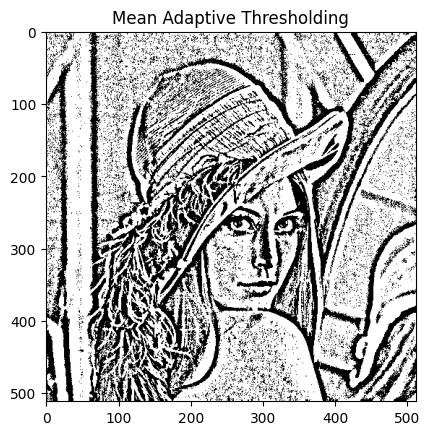

In [12]:
adaptive_image = AdaptiveThreshold_Mean(new_image)
plt.imshow(adaptive_image, cmap='gray')
plt.title("Mean Adaptive Thresholding")
plt.show()

In [13]:
def gaussian_kernel(size, sigma=1):
    # Membuat kernel Gaussian secara manual
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size//2))**2 + (y-(size//2))**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

def convolve(new_image, kernel):
    # Menerapkan konvolusi gambar dengan kernel
    M, N = new_image.shape
    k_size = kernel.shape[0]
    pad = k_size // 2 

    # Menambahkan padding ke gambar untuk menghindari kehilangan data pada tepi
    padded_image = np.pad(new_image, pad, mode='reflect')
    new_image2 = np.zeros_like(new_image, dtype=np.float32)

    # Melakukan konvolusi dengan mengalikan kernel pada setiap bagian gambar
    for i in range(M):
        for j in range(N):
            region = padded_image[i:i+k_size, j:j+k_size]
            new_image2[i, j] = np.sum(region * kernel)
    
    return new_image2

def AdaptiveThreshold_Gaussian(new_image, window_size=15, C=5, sigma=3):
    # Melakukan Thresholding Adaptif menggunakan kernel Gaussian
    kernel = gaussian_kernel(window_size, sigma)
    gaussian_mean = convolve(new_image, kernel) 
    
    # Menetapkan nilai piksel berdasarkan perbandingan dengan rata-rata Gaussian
    new_image2 = np.where(new_image > (gaussian_mean - C), 255, 0).astype(np.uint8)
    
    return new_image2

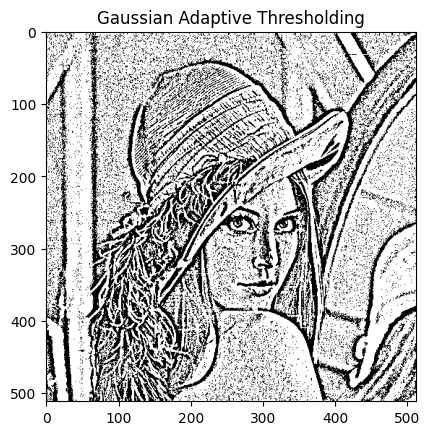

In [14]:
adaptive_image = AdaptiveThreshold_Gaussian(new_image, window_size=15, C=3, sigma=3)
plt.imshow(adaptive_image, cmap='gray')
plt.title("Gaussian Adaptive Thresholding")
plt.show()